<a href="https://colab.research.google.com/github/PR-2023/CECS550/blob/main/Feature_engineering_%2B_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [ ]:
user_info = pd.read_csv("/content/drive/MyDrive/CECS550/data_format1/user_info_format1.csv");
user_log = pd.read_csv("/content/drive/MyDrive/CECS550/data_format1/user_log_format1.csv");
train_format = pd.read_csv("/content/drive/MyDrive/CECS550/data_format1/train_format1.csv");


In [ ]:
user_log = user_log[(user_log['item_id']>=641) & (user_log['item_id'] <=800)]
# user_log.to_csv("/content/drive/MyDrive/CECS550/data_format1/user_log_modified.csv",index=False)

In [ ]:
user_info.columns

Index(['user_id', 'age_range', 'gender'], dtype='object')

In [ ]:
user_log.columns

Index(['user_id', 'item_id', 'cat_id', 'seller_id', 'brand_id', 'time_stamp',
       'action_type'],
      dtype='object')

In [ ]:
train_format.columns

Index(['user_id', 'merchant_id', 'label'], dtype='object')

In [ ]:
user_log = user_log.rename(columns={'seller_id': 'merchant_id'})

In [ ]:
data = pd.merge(user_log, user_info, on='user_id', how='left')
train_format.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [ ]:
data = pd.merge(data, train_format, on=['user_id', 'merchant_id'])
print(data.head())


   user_id  item_id  cat_id  merchant_id  brand_id  time_stamp  action_type  \
0   310303      650     656         3473    3305.0        1111            0   
1   310303      650     656         3473    3305.0        1111            0   
2   310303      650     656         3473    3305.0        1111            2   
3   310303      650     656         3473    3305.0        1111            0   
4   156939      653      35         4267    6046.0        1111            0   

   age_range  gender  label  
0        4.0     0.0      0  
1        4.0     0.0      0  
2        4.0     0.0      0  
3        4.0     0.0      0  
4        4.0     1.0      1  


In [ ]:
data.shape

(449, 10)

In [ ]:

data['Day']=data['time_stamp']%100
data['Month']=(data['time_stamp']-data['Day'])/100
data = data.drop(columns = ['time_stamp'])


In [ ]:
#activity_count of user
activity_count = data.groupby('user_id')['action_type'].count().reset_index()
activity_count.columns = ['user_id', 'activity_count']
data = pd.merge(data, activity_count, on='user_id', how='left')

In [ ]:
data.shape

(449, 12)

In [ ]:
click_count = data[data['action_type']==0].groupby('user_id')['action_type'].count().reset_index()
click_count.columns = ['user_id', 'click_count']
data = pd.merge(data,click_count,on='user_id', how='left')

In [ ]:
data.shape

(449, 13)

In [ ]:
add_to_cart_count = data[data['action_type']==1].groupby('user_id')['action_type'].count().reset_index()
add_to_cart_count.columns = ['user_id', 'add_to_cart_count']
data = pd.merge(data, add_to_cart_count, on='user_id', how='left')

In [ ]:
data.shape

(449, 14)

In [ ]:
purchase_count = data[data['action_type']==2].groupby('user_id')['action_type'].count().reset_index()
purchase_count.columns = ['user_id', 'purchase_count']
data = pd.merge(data, purchase_count, on='user_id', how='left')

In [ ]:
data.shape

(449, 15)

In [ ]:
favourite_count = data[data['action_type']==3].groupby('user_id')['action_type'].count().reset_index()
favourite_count.columns = ['user_id', 'favourite_count']
data = pd.merge(data, favourite_count, on='user_id', how='left')

In [ ]:
data.shape

(449, 16)

In [ ]:
data[['click_count','activity_count','add_to_cart_count','purchase_count','favourite_count']] = data[['click_count','activity_count','add_to_cart_count','purchase_count','favourite_count']].fillna(0)

In [ ]:
data['gender'] = data['gender'].fillna(2)

In [ ]:
user_gender = label_binarize(np.array(data.gender), classes=[0,1,2])
user_gender = pd.DataFrame(data=user_gender, columns=['gender_female','gender_male','gender_unknown'])
data['user_gender_female']=user_gender['gender_female']
data['user_gender_male']=user_gender['gender_male']
data['user_gender_unknown']=user_gender['gender_unknown']
data = data.drop(columns = ['gender'])
data.head()

,user_id,item_id,cat_id,merchant_id,brand_id,action_type,age_range,label,Day,Month,activity_count,click_count,add_to_cart_count,purchase_count,favourite_count,user_gender_female,user_gender_male,user_gender_unknown
0,310303,650,656,3473,3305.0,0,4.0,0,11,11.0,4,3.0,0.0,1.0,0.0,1,0,0
1,310303,650,656,3473,3305.0,0,4.0,0,11,11.0,4,3.0,0.0,1.0,0.0,1,0,0
2,310303,650,656,3473,3305.0,2,4.0,0,11,11.0,4,3.0,0.0,1.0,0.0,1,0,0
3,310303,650,656,3473,3305.0,0,4.0,0,11,11.0,4,3.0,0.0,1.0,0.0,1,0,0
4,156939,653,35,4267,6046.0,0,4.0,1,11,11.0,2,1.0,0.0,1.0,0.0,0,1,0


In [ ]:
data.shape

(449, 18)

In [ ]:
user_activity = data[['user_id','action_type']].copy()
user_activity_info = label_binarize(np.array(data.action_type), classes=[0,1,2,3])
user_activity_info = pd.DataFrame(data = user_activity_info, columns=['Click','add_to_cart','purchase','add_to_favorite'])
user_activity['user_Click']= user_activity_info.Click
user_activity['user_Add_to_cart']=user_activity_info.add_to_cart
user_activity['user_purchase']=user_activity_info.purchase
user_activity['user_Add_to_favorite']=user_activity_info.add_to_favorite

data = pd.merge(data, user_activity, on=['user_id','action_type'], how='left')
data.head()

,user_id,item_id,cat_id,merchant_id,brand_id,action_type,age_range,label,Day,Month,...,add_to_cart_count,purchase_count,favourite_count,user_gender_female,user_gender_male,user_gender_unknown,user_Click,user_Add_to_cart,user_purchase,user_Add_to_favorite
0,310303,650,656,3473,3305.0,0,4.0,0,11,11.0,...,0.0,1.0,0.0,1,0,0,1,0,0,0
1,310303,650,656,3473,3305.0,0,4.0,0,11,11.0,...,0.0,1.0,0.0,1,0,0,1,0,0,0
2,310303,650,656,3473,3305.0,0,4.0,0,11,11.0,...,0.0,1.0,0.0,1,0,0,1,0,0,0
3,310303,650,656,3473,3305.0,0,4.0,0,11,11.0,...,0.0,1.0,0.0,1,0,0,1,0,0,0
4,310303,650,656,3473,3305.0,0,4.0,0,11,11.0,...,0.0,1.0,0.0,1,0,0,1,0,0,0


In [ ]:
data.fillna(0,inplace=True)

In [ ]:
data.shape

(3309, 22)

In [ ]:
data['age_range'] = data['age_range'].replace(8,7)
age =  pd.DataFrame(pd.get_dummies(data['age_range']))
column_name = {3.0:'age_25_29',
4.0:'age_30_34',
0.0:'age_0_18',
2.0:'age_18_24',
6.0:'age_40_49',
5.0:'age_35_39'}
age = age.rename(columns=column_name)

In [ ]:
for val in age.columns:
  data[val] = age[val]
data = data.drop(columns=['age_range'])

In [ ]:
data.shape

(3309, 27)

In [ ]:
data.head().T

,0,1,2,3,4
user_id,310303.0,310303.0,310303.0,310303.0,310303.0
item_id,650.0,650.0,650.0,650.0,650.0
cat_id,656.0,656.0,656.0,656.0,656.0
merchant_id,3473.0,3473.0,3473.0,3473.0,3473.0
brand_id,3305.0,3305.0,3305.0,3305.0,3305.0
action_type,0.0,0.0,0.0,0.0,0.0
label,0.0,0.0,0.0,0.0,0.0
Day,11.0,11.0,11.0,11.0,11.0
Month,11.0,11.0,11.0,11.0,11.0
activity_count,4.0,4.0,4.0,4.0,4.0


<h2>Seller Level Info<h2>

We try to find new features with respect to different criteria i.e the merchant having interaction with item,brand,cateogry,

In [ ]:

merchant_item = data.loc[:, ['merchant_id', 'item_id']]

merchant_item = merchant_item.drop_duplicates(subset='item_id')

merchant_item_info = merchant_item.groupby('merchant_id').agg({'item_id': 'count'}).reset_index()

merchant_item_info = merchant_item_info.rename(columns={'item_id': 'merchant_item_count'})

print(merchant_item_info.head(50))

data = pd.merge(data, merchant_item_info, on='merchant_id', how='left')


    merchant_id  merchant_item_count
0           252                    1
1           350                    1
2           412                    1
3           523                    1
4           586                    1
5           630                    1
6           643                    1
7           804                    1
8          1429                    1
9          1472                    1
10         1501                    1
11         1840                    1
12         1841                    1
13         1944                    1
14         2242                    1
15         3432                    1
16         3473                    1
17         3502                    1
18         3828                    1
19         4267                    1
20         4502                    1
21         4534                    1
22         4847                    1
23         4850                    1


In [ ]:

merchant_brand = data.loc[:, ['merchant_id', 'brand_id']]

merchant_brand = merchant_brand.drop_duplicates(subset='brand_id')

merchant_brand_info = merchant_brand.groupby('merchant_id').agg({'brand_id': 'count'}).reset_index()

merchant_brand_info = merchant_brand_info.rename(columns={'brand_id': 'merchant_brand_count'})

print(merchant_brand_info.head(50))

data = pd.merge(data, merchant_brand_info, on='merchant_id', how='left')

    merchant_id  merchant_brand_count
0           252                     1
1           350                     1
2           412                     1
3           523                     1
4           586                     1
5           630                     1
6           643                     1
7           804                     1
8          1429                     1
9          1472                     1
10         1501                     1
11         1840                     1
12         1841                     1
13         1944                     1
14         2242                     1
15         3432                     1
16         3473                     1
17         3502                     1
18         3828                     1
19         4267                     1
20         4502                     1
21         4534                     1
22         4847                     2
23         4850                     1


<h2>User Seller Info<h2>

In [ ]:
merchant_cat = data.loc[:, ['merchant_id', 'cat_id']]
merchant_cat_info = merchant_cat.groupby('merchant_id').agg({'cat_id': 'count'}).reset_index()
merchant_cat_info = merchant_cat_info.rename(columns={'cat_id': 'merchant_cat_count'})
print(merchant_cat_info.head(50))
data = pd.merge(data, merchant_cat_info, on='merchant_id', how='left')

    merchant_id  merchant_cat_count
0           252                   1
1           350                 232
2           412                   1
3           523                   1
4           586                  11
5           630                  51
6           643                   5
7           804                  28
8          1429                   1
9          1472                  10
10         1501                  15
11         1840                   7
12         1841                   1
13         1944                   1
14         2242                   1
15         3432                   1
16         3473                2460
17         3502                   1
18         3828                   3
19         4267                 366
20         4502                   1
21         4534                  55
22         4847                  39
23         4850                  17


In [ ]:
user_merchant = data.loc[:, ['user_id','merchant_id']]
user_merchant = user_merchant.drop_duplicates(subset='merchant_id')
user_merchant_info = user_merchant.groupby('user_id').agg({'merchant_id': 'count'}).reset_index()
user_merchant_info = user_merchant_info.rename(columns={'merchant_id': 'user_merchant_count'})
print(user_merchant_info.head(50))
data = pd.merge(data, user_merchant_info, on='user_id', how='left')

    user_id  user_merchant_count
0     14196                    1
1     54738                    1
2     56665                    1
3     63183                    1
4     80940                    1
5     87997                    1
6     92655                    1
7    112081                    1
8    112950                    1
9    148947                    1
10   156939                    1
11   156965                    1
12   182603                    1
13   242112                    1
14   264378                    1
15   310303                    1
16   313743                    1
17   316744                    1
18   327778                    1
19   329471                    1
20   329675                    1
21   337468                    1
22   355457                    1
23   413107                    1


In [ ]:
user_cat = data.loc[:, ['user_id','cat_id']]
user_cat = user_cat.drop_duplicates(subset='cat_id')
user_cat_info = user_cat.groupby('user_id').agg({'cat_id': 'count'}).reset_index()
user_cat_info = user_cat_info.rename(columns={'cat_id': 'user_cat_count'})
print(user_cat_info.head(50))
data = pd.merge(data, user_cat_info, on='user_id', how='left')

    user_id  user_cat_count
0     14196               1
1     54738               1
2     56665               1
3     63183               1
4     80940               1
5     87997               1
6     92655               1
7    112950               1
8    156939               1
9    156965               1
10   182603               1
11   242112               1
12   310303               1
13   313743               1
14   316744               1
15   327778               1
16   329471               1
17   337468               1
18   355457               1
19   413107               1


In [ ]:
user_brand = data.loc[:, ['user_id','brand_id']]
user_brand = user_brand.drop_duplicates(subset='brand_id')
user_brand_info = user_brand.groupby('user_id').agg({'brand_id': 'count'}).reset_index()
user_brand_info = user_brand_info.rename(columns={'brand_id': 'user_brand_count'})
print(user_brand_info.head(50))
data = pd.merge(data, user_brand_info, on='user_id', how='left')

    user_id  user_brand_count
0     14196                 1
1     54738                 1
2     56665                 1
3     63183                 1
4     80940                 1
5     87997                 1
6     92655                 1
7    112081                 1
8    112950                 1
9    148947                 1
10   156939                 1
11   156965                 2
12   182603                 1
13   242112                 1
14   264378                 1
15   310303                 1
16   313743                 1
17   316744                 1
18   327778                 1
19   329471                 1
20   329675                 1
21   337468                 1
22   355457                 1
23   413107                 1


<h2>User Seller Merchant Info<h2>

In [ ]:
user_brand = data.loc[:, ['user_id','merchant_id','brand_id']]
user_brand_info = user_brand.groupby(['user_id','merchant_id']).agg({'brand_id': 'count'}).reset_index()
user_brand_info = user_brand_info.rename(columns={'brand_id': 'user_merchant_brand_count'})
print(user_brand_info.head(50))
data = pd.merge(data, user_brand_info, on=['user_id','merchant_id'], how='left')

    user_id  merchant_id  user_merchant_brand_count
0      6308         4267                          9
1     14196         4850                          1
2     15333         3473                          2
3     21456         4267                          4
4     22289         4267                          1
5     30637         4267                         49
6     31008          643                          1
7     39322         1501                          1
8     40560         3473                        198
9     42310         4850                         16
10    42460         4267                          4
11    43489         4267                          1
12    44525         4534                          1
13    47962          804                          4
14    54159         3473                         26
15    54738          586                          9
16    54820         1501                          1
17    55308          804                          4
18    56282 

In [ ]:
user_merchant_cat = data.loc[:, ['user_id','merchant_id','cat_id']]
user_merchant_cat_info = user_merchant_cat.groupby(['user_id','merchant_id']).agg({'cat_id': 'count'}).reset_index()
user_merchant_cat_info = user_merchant_cat_info.rename(columns={'cat_id': 'user_merchant_cat_count'})
print(user_merchant_cat_info.head(50))
data = pd.merge(data, user_merchant_cat_info, on=['user_id','merchant_id'], how='left')

    user_id  merchant_id  user_merchant_cat_count
0      6308         4267                        9
1     14196         4850                        1
2     15333         3473                        2
3     21456         4267                        4
4     22289         4267                        1
5     30637         4267                       49
6     31008          643                        1
7     39322         1501                        1
8     40560         3473                      198
9     42310         4850                       16
10    42460         4267                        4
11    43489         4267                        1
12    44525         4534                        1
13    47962          804                        4
14    54159         3473                       26
15    54738          586                        9
16    54820         1501                        1
17    55308          804                        4
18    56282         4847                        1


In [ ]:
user_merchant_day_cat = data.loc[:, ['user_id','merchant_id','Day','cat_id']]
user_merchant_day_cat_info = user_merchant_day_cat.groupby(['user_id','merchant_id','Day']).agg({'cat_id': 'count'}).reset_index()
user_merchant_day_cat_info = user_merchant_day_cat_info.rename(columns={'cat_id': 'user_merchant_day_cat_count'})


data = pd.merge(data, user_merchant_day_cat_info, on=['user_id','merchant_id','Day'], how='left')

print(user_merchant_day_cat_info.head(10))

   user_id  merchant_id  Day  user_merchant_day_cat_count
0     6308         4267   10                            9
1    14196         4850   28                            1
2    15333         3473   11                            2
3    21456         4267   11                            4
4    22289         4267   11                            1
5    30637         4267   10                           14
6    30637         4267   11                           35
7    31008          643   10                            1
8    39322         1501   10                            1
9    40560         3473    8                           56


In [ ]:
data.shape

(3309, 36)

In [ ]:
data.columns

Index(['user_id', 'item_id', 'cat_id', 'merchant_id', 'brand_id',
       'action_type', 'label', 'Day', 'Month', 'activity_count', 'click_count',
       'add_to_cart_count', 'purchase_count', 'favourite_count',
       'user_gender_female', 'user_gender_male', 'user_gender_unknown',
       'user_Click', 'user_Add_to_cart', 'user_purchase',
       'user_Add_to_favorite', 'age_0_18', 'age_18_24', 'age_25_29',
       'age_30_34', 'age_35_39', 'age_40_49', 'merchant_item_count',
       'merchant_brand_count', 'merchant_cat_count', 'user_merchant_count',
       'user_cat_count', 'user_brand_count', 'user_merchant_brand_count',
       'user_merchant_cat_count', 'user_merchant_day_cat_count'],
      dtype='object')

In [ ]:
len(data)

3309

In [ ]:
numerical_features = ['activity_count', 'click_count',
       'add_to_cart_count', 'purchase_count', 'favourite_count','merchant_item_count',
        'merchant_brand_count', 'merchant_cat_count', 'user_merchant_count',
        'user_cat_count', 'user_brand_count', 'user_merchant_brand_count',
        'user_merchant_cat_count', 'user_merchant_day_cat_count']

In [ ]:
numerical_data = data[numerical_features]

In [ ]:
categorical_features = list(set(data.columns)- set(numerical_features))

In [ ]:
categorical_data = data[categorical_features]

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3309.0,224021.426111,114539.204219,6308.0,135595.0,196029.0,327778.0,414003.0
item_id,3309.0,660.195527,28.645514,644.0,650.0,650.0,653.0,798.0
cat_id,3309.0,634.822907,311.445412,35.0,656.0,656.0,656.0,1577.0
merchant_id,3309.0,3279.944394,1019.598601,252.0,3473.0,3473.0,3473.0,4850.0
brand_id,3309.0,3586.232699,1059.355053,799.0,3305.0,3305.0,3305.0,7863.0
action_type,3309.0,0.045331,0.323972,0.0,0.0,0.0,0.0,3.0
label,3309.0,0.011484,0.106562,0.0,0.0,0.0,0.0,1.0
Day,3309.0,11.218495,4.721091,1.0,10.0,11.0,11.0,31.0
Month,3309.0,10.867029,0.577567,5.0,11.0,11.0,11.0,11.0
activity_count,3309.0,14.993351,6.637073,1.0,9.0,16.0,21.0,24.0


In [ ]:
data.to_csv (r'/content/drive/MyDrive/CECS550/data_format1/train_complete_features.csv', index = False, header=True)

Feature Ranking

                        Feature  MI Score
33      user_merchant_cat_count  0.047874
32    user_merchant_brand_count  0.047222
8                activity_count  0.044747
0                       user_id  0.037655
34  user_merchant_day_cat_count  0.036526
9                   click_count  0.034924
28           merchant_cat_count  0.030913
1                       item_id  0.030142
3                   merchant_id  0.027390
4                      brand_id  0.026619
2                        cat_id  0.026384
11               purchase_count  0.015439
7                         Month  0.014435
27         merchant_brand_count  0.007398
13           user_gender_female  0.007220
6                           Day  0.006449
15          user_gender_unknown  0.005331
29          user_merchant_count  0.005283
12              favourite_count  0.004984
23                    age_30_34  0.004916
24                    age_35_39  0.004268
30               user_cat_count  0.004177
31             user_brand_count  0

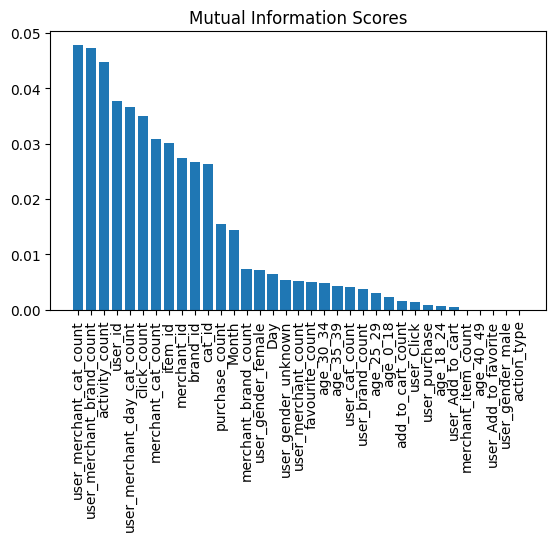

In [ ]:
# Import libraries
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt


# Separate features and target
X = data.drop('label', axis=1)
X.fillna(0, inplace=True)
y = data['label']

# Calculate mutual information between features and target
mi_scores = mutual_info_classif(X, y)

# Create dataframe to store feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort features by MI scores in descending order
feature_scores = feature_scores.sort_values('MI Score', ascending=False)

# Print feature ranking
print(feature_scores)
mi_scores_feature_importance = dict(zip(X.columns, mi_scores))



# Plot feature importances
plt.figure()
plt.title("Mutual Information Scores")
plt.bar(feature_scores['Feature'], feature_scores['MI Score'])
plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom=0.3)
plt.show()


Feature ranking:
1. user_id: 0.15652247154205465
2. user_merchant_brand_count: 0.10455674333431604
3. activity_count: 0.07559986154967821
4. Day: 0.06761428469807265
5. user_merchant_cat_count: 0.06507805745321814
6. click_count: 0.06402553302930829
7. merchant_id: 0.05250352779775389
8. brand_id: 0.04696871053113712
9. user_merchant_day_cat_count: 0.04065636489767014
10. merchant_cat_count: 0.038414014088815396
11. Month: 0.03480858029745162
12. cat_id: 0.033280181932617656
13. item_id: 0.032283362433347285
14. merchant_brand_count: 0.027475140952276825
15. age_30_34: 0.022926852340315027
16. user_gender_unknown: 0.018194227750699874
17. age_35_39: 0.01627721110710749
18. user_cat_count: 0.012855352858312175
19. purchase_count: 0.011318314344878275
20. user_merchant_count: 0.010841089502918195
21. user_gender_female: 0.010209708966270188
22. age_25_29: 0.010085529466401271
23. age_40_49: 0.008389312935909377
24. user_brand_count: 0.008205421810808433
25. age_18_24: 0.00774165253563834

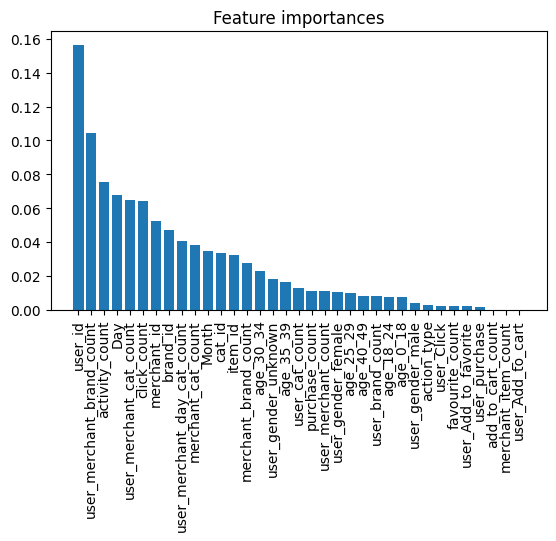

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


# Split data into X and y
X = data.drop("label", axis=1)
y = data["label"]
X.fillna(0,inplace=True)
# Train random forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

importances = rf.feature_importances_

# Sort features by importance score
indices = importances.argsort()[::-1]

# Print feature ranking
rf_feature_importance_dict = dict()
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. {X.columns[indices[f]]}: {importances[indices[f]]}")
    rf_feature_importance_dict[X.columns[indices[f]]]=importances[indices[f]]

# Plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.subplots_adjust(bottom=0.3)
plt.show()

Feature ranking:
1. click_count: 0.23939669132232666
2. merchant_brand_count: 0.22854925692081451
3. activity_count: 0.15933385491371155
4. age_40_49: 0.11420058459043503
5. Day: 0.060186538845300674
6. age_30_34: 0.046633053570985794
7. merchant_id: 0.035900916904211044
8. user_id: 0.03108569234609604
9. user_cat_count: 0.018214095383882523
10. user_merchant_day_cat_count: 0.01318058930337429
11. item_id: 0.012836961075663567
12. age_35_39: 0.012246851809322834
13. brand_id: 0.007431583013385534
14. cat_id: 0.006994405761361122
15. age_25_29: 0.006849354598671198
16. merchant_cat_count: 0.0065419734455645084
17. purchase_count: 0.0004175342619419098
18. user_merchant_brand_count: 0.0
19. action_type: 0.0
20. user_brand_count: 0.0
21. Month: 0.0
22. user_merchant_count: 0.0
23. add_to_cart_count: 0.0
24. favourite_count: 0.0
25. merchant_item_count: 0.0
26. user_gender_female: 0.0
27. user_gender_male: 0.0
28. user_gender_unknown: 0.0
29. user_Click: 0.0
30. user_merchant_cat_count: 0.

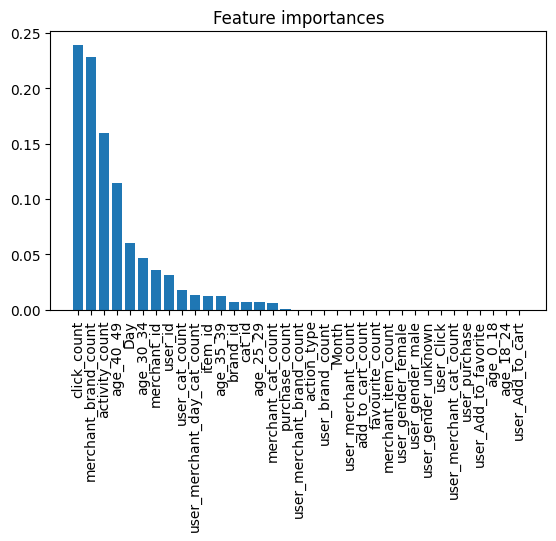

In [ ]:
from xgboost import XGBClassifier
import pandas as pd


# Split data into X and y
X = data.drop("label", axis=1)
y = data["label"]
# Train XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X, y)

# Get feature importance scores
importances = xgb_model.feature_importances_

# Sort features by importance score
indices = importances.argsort()[::-1]

xgb_feature_importance_dict = dict()
# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. {X.columns[indices[f]]}: {importances[indices[f]]}")
    xgb_feature_importance_dict[X.columns[indices[f]]]=importances[indices[f]]


# Plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.subplots_adjust(bottom=0.3)
plt.show()

user_merchant_cat_count: 0.0022665457842248604
user_merchant_brand_count: 0.0014203686914475377
merchant_id: 0.001269265639165873
user_id: 0.0009368389241462771
item_id: 0.0008461770927773226
click_count: 0.0005439709882139931
Day: 0.00048352976730132725
age_30_34: 0.00048352976730132725
activity_count: 0.0003022061045633295
age_35_39: 0.0003022061045633295
age_40_49: 0.0003022061045633295
merchant_cat_count: 0.0003022061045633295
brand_id: 0.00027198549410699656
Month: 0.00027198549410699656
cat_id: 0.00024176488365066363
action_type: 0.0
add_to_cart_count: 0.0
purchase_count: 0.0
favourite_count: 0.0
user_gender_female: 0.0
user_gender_male: 0.0
user_gender_unknown: 0.0
user_Click: 0.0
user_Add_to_cart: 0.0
user_purchase: 0.0
user_Add_to_favorite: 0.0
age_0_18: 0.0
age_18_24: 0.0
age_25_29: 0.0
merchant_item_count: 0.0
merchant_brand_count: 0.0
user_merchant_count: 0.0
user_cat_count: 0.0
user_brand_count: 0.0
user_merchant_day_cat_count: 0.0


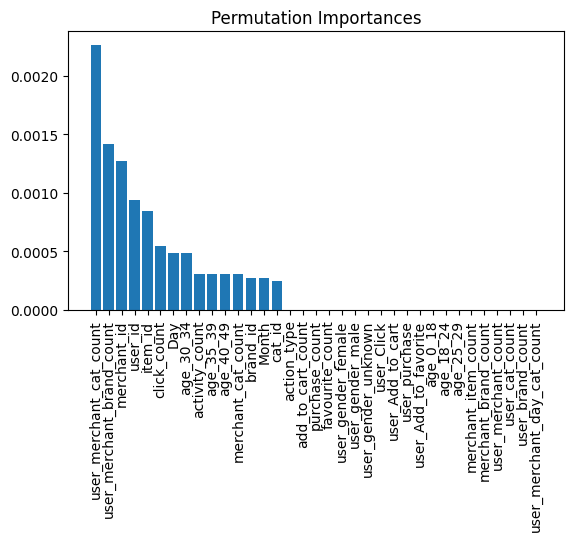

In [ ]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt


# Separate features and target
X = data.drop('label', axis=1)
y = data['label']

# Fill NaN values with 0
X.fillna(0, inplace=True)

# Train Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)

# Calculate permutation importances
result = permutation_importance(rf, X, y, n_repeats=10)

# Get feature importances
importances = result.importances_mean

# Sort feature importances
sorted_importances = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

permutation_import_feature_importance_dict = dict()
# Print feature importances in sorted order
for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")
    permutation_import_feature_importance_dict[feature]=importance

# Plot feature importances
plt.figure()
plt.title("Permutation Importances")
plt.bar([x[0] for x in sorted_importances], [x[1] for x in sorted_importances])
plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom=0.3)
plt.show()


click_count: 0.33889018688608996
activity_count: 0.2799826026399538
merchant_brand_count: 0.2634225976136491
user_id: 0.22619957605402868
user_merchant_brand_count: 0.15319868581423615
Day: 0.13473324500831407
age_40_49: 0.12289210363090773
merchant_id: 0.11706349527750859
user_merchant_cat_count: 0.11521878773622922
user_merchant_day_cat_count: 0.0903629886233848
brand_id: 0.08129084825101368
merchant_cat_count: 0.07617094227246612
item_id: 0.07610838037971598
age_30_34: 0.07495990851975574
cat_id: 0.06690019161264685
Month: 0.04951558628859277
user_cat_count: 0.03524633646455176
age_35_39: 0.03309407352306708
purchase_count: 0.027175329806431656
user_gender_unknown: 0.023525685928052684
age_25_29: 0.020021375361690446
user_gender_female: 0.017430098312927328
user_merchant_count: 0.016123921029478034
user_brand_count: 0.012039484565588699
age_0_18: 0.010050584709584365
age_18_24: 0.008377679155659505
favourite_count: 0.007432497784987405
user_gender_male: 0.004127520244183561
user_Cli

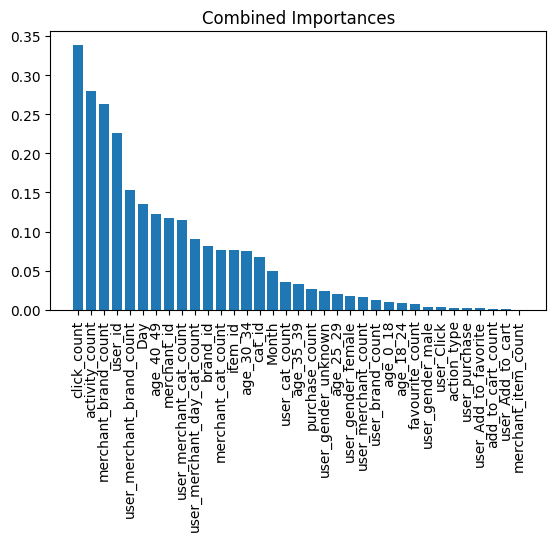

In [ ]:

# Create a dictionary to store the combined importance scores
combined_dict = {}

# Loop over all features in the four dictionaries
for feature in rf_feature_importance_dict.keys():
    
    # Add the importance scores of the feature from all four dictionaries
    combined_score = rf_feature_importance_dict[feature] + mi_scores_feature_importance[feature] + permutation_import_feature_importance_dict[feature] + xgb_feature_importance_dict[feature]
    
    # Store the combined importance score for the feature in the combined dictionary
    combined_dict[feature] = combined_score

# Sort the features by their combined importance scores in descending order
sorted_features = sorted(combined_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

plt.figure()
plt.title("Combined Importances")
plt.bar([x[0] for x in sorted_features], [x[1] for x in sorted_features])
plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom=0.3)
plt.show()



<ipython-input-65-0aecdc6ffdcd>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0,inplace=True)


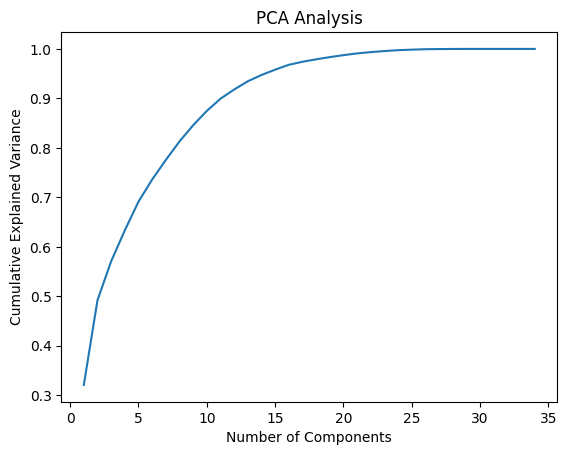

Number of optimal components:  15


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select columns
selected_columns = data.columns.tolist()
selected_columns.remove('user_id')
selected_columns.remove('label')

# Define data preprocessing pipeline
preprocessing_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    PCA()
)

# Fit and transform the data
X = data[selected_columns]
y = data['label']
X.fillna(0,inplace=True)
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
X_transformed = preprocessing_pipeline.fit_transform(X_resampled)

# Plot PCA analysis
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Analysis')
plt.show()

# Determine optimal number of components
optimal_components = (pca.explained_variance_ratio_.cumsum() >= 0.95).argmax() + 1
print("Number of optimal components: ", optimal_components)
